# Defining cell types by their electrophysiology

### The brain has thousands of different types of cells. How do we even begin to tease them apart?

We can define neurons by their <b>gene expression patterns</b>, <b>electrophysiology features</b>, and <b>structure</b>. Here, we'll use electrophysiology and structural (morphology) features to compare and contrast cell types in the brain.

This notebook will help us investigate specific features in the electrophysiology dataset from the Allen Brain Atlas. Along the way, you'll encounter some concepts about coding in Python.

### Before diving into this notebook:
- Complete [the web-based activity](https://sites.google.com/ucsd.edu/neuroedu/cell-types/web-instructions?authuser=0), which asks you to look at this data on the Allen Institute website.
  
<hr>

## Tutorial Steps
1. [Set up our coding environment](#setup)

**Data from a single cell**. *Steps 2-4 are an optional demonstration of the same cell from the [web-based activity](https://sites.google.com/ucsd.edu/neuroedu/cell-types?authuser=0). 

2. [Import data for a single cell](#import)
3. [Plot a raw sweep of data](#plotsweep)
4. [Plot the morphology of the cell](#morphology)

**Data from many cells**. *Steps 5-7 will help you look at pre-computed features for all of the cells in the database.*

5. [Analyze computed features](#metrics)
6. [Compare action potential waveforms](#waveforms)
7. [Compare cell types](#compare)
<hr>

<a id="setup"></a>
## Step 1. Set up our coding environment
Whenever we start an analysis in Python, we need to be sure to import the necessary code packages. If you're running this notebook on Colab or Binder, the cells below will install packages into your coding environment -- we are *not* installing anything on your computer.

### Install the AllenSDK
The Allen Institute has compiled a set of code and tools called a **Software Development Kit** (SDK). These tools will help us import and analyze the cell types data. See [Technical Notes](#technical) at the end of this notebook for more information about working with the AllenSDK.

><b>Task</b>: Run the cell below, which will install the allensdk into your coding environment.

**Technical notes about installing the allensdk**
- If you're running this in Colab, you'll also be prompted to **Restart Runtime** after this is completed. Click the **Restart Runtime** button (nothing will happen), and then you're ready to proceed.
- If you receive an error or are running this notebook on your local computer, there are additional instructions on how to install the SDK locally <a href="http://alleninstitute.github.io/AllenSDK/install.html">here</a>.

In [1]:
# This will ensure that the AllenSDK is installed.
try:
    import allensdk
    print('allensdk imported')
except ImportError as e:
    !pip install allensdk

allensdk imported


><b>Task</b>: We also need to make sure that our coding environment has [NumPy](https://numpy.org/), [Pandas](https://pandas.pydata.org/), and [Matplotlib](https://matplotlib.org/) already installed. Run the cell below -- any packages that are missing will be installed for you.

In [2]:
# This will ensure that NumPy, Pandas, and Matplotlib are installed.
try:
    import numpy
    print('numpy already installed')
except ImportError as e:
    !pip install numpy
try:
    import pandas
    print('pandas already installed')
except ImportError as e:
    !pip install pandas  
try:
    import matplotlib
    print('matplotlib already installed')
except ImportError as e:
    !pip install matplotlib

numpy already installed
pandas already installed
matplotlib already installed


### Import common packages
Below, we'll `import` a common selection of packages that will help us analyze and plot our data. We'll also configure the plotting in our notebook.

In [3]:
# Import our plotting package from matplotlib
import matplotlib.pyplot as plt

# Specify that all plots will happen inline & in high resolution
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

# Import pandas for working with databases
import pandas as pd
import numpy as np

### Import the CellTypesModule from the allensdk
With the allensdk installed, we can `import` the **CellTypesCache module**.

The CellTypesCache that we're importing provides tools to allow us to get information from the cell types database. We're giving it a **manifest** filename as well. CellTypesCache will create this manifest file, which contains metadata about the cache. If you want, you can look in the cell_types folder in your code directory and take a look at the file.

><b>Task</b>: Run the cell below. If you'd like a slightly faster way of working with the raw data files required by this notebook, you can also **uncomment** (remove the `#`) from the `!git` and `%cd` lines below to clone the data from Github.

In [4]:
#Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

#If you're short on time, clone the repository to get the raw data
#!git clone https://github.com/ajuavinett/CellTypesLesson.git
#%cd CellTypesLesson

#Initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

print('CellTypesCache imported.')

CellTypesCache imported.


<a id="import"></a>

## Step 2. Import Cell Types data
**Note**:  *Steps 2-4 are an optional demonstration of the same cell from the [web-based activity](https://sites.google.com/ucsd.edu/neuroedu/cell-types?authuser=0). These steps can be skipped if you'd like to dive into analyzing populations of cells below.*

Now that we have the module that we need, let's import a raw sweep of the data. The cell below will grab the data for the same experiment you just looked at on the website. This data is in the form of a [**Neuroscience Without Borders** (NWB)](https://www.nwb.org/) file.

><b>Task</b>: Find the cell specimen ID for the first cell you looked at on the Allen Institute website (hint: it's in the URL), and assign this to <code>cell_id</code> below by replacing the <code>...</code>. Run the cell.

This might take a minute or two. You should wait until the circle in the upper right is <i>not</i> filled (Jupyter Notebook) or you have a green checkmark (Colab) to continue.

In [6]:
# Enter your cell_id below
cell_id = 474626527 

# Get the electrophysiology (ephys) data for that cell
data = ctc.get_ephys_data(cell_id)
print('Data retrieved')

2024-04-26 10:24:36,208 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491198297


Data retrieved


Thankfully, our NWB file has some built-in **methods** to enable us to pull out a recording sweep. We can access methods of objects like our `data` object by adding a period, and then the method. That's what we're doing below, with `data.get_sweep()`.


><b>Task:</b> Choose your favorite sweep below. (<u>Hint</u>: go back to the website to see what the sweep numbers are.)
    
<i>Note</i>: You may get an `H5pyDeprecationWarning`, but don't worry about it. This is out of our control. :)

In [7]:
# Assign your favorite sweep number to a variable "sweep_number" below.
sweep_number = 27

sweep_data = data.get_sweep(sweep_number) 
print('Sweep obtained')

Sweep obtained


<a id="plotsweep"></a>
## Step 3. Plot a raw sweep of data
Now that you've pulled down some data, chosen a cell, and chosen a sweep number, let's plot that data.

><b>Task:</b> Run the cell below to get the stimulus and recorded response information from the dataset.

In [9]:
# Get the stimulus trace (in amps) and convert to pA
stim_current = sweep_data['stimulus'] * 1e12

# Get the voltage trace (in volts) and convert to mV
response_voltage = sweep_data['response'] * 1e3

# Get the sampling rate and can create a time axis for our data
sampling_rate = sweep_data['sampling_rate'] # in Hz
timestamps = (np.arange(0, len(response_voltage)) * (1.0 / sampling_rate))

><b>Task</b>: In the cell below, use the <code>plt.plot(x,y)</code> to plot our voltage trace.
>- You will need to give it two arguments, which are variables we created above: <code>timestamps</code> (x axis) and <code>response_voltage</code>(y).
- Without changing the limits on the x-axis, you won't be able to see individual action potentials.
- Modify the x-axis using <code>plt.xlim([min,max])</code> to specify the limits (replace <code>min</code> and <code>max</code> with numbers that make sense for this x-axis.
- If you'd like to plot the current that was injected into the cell, you can plot <code>stim_current</code> instead of <code>response_voltage.</code>

(1.1, 1.5)

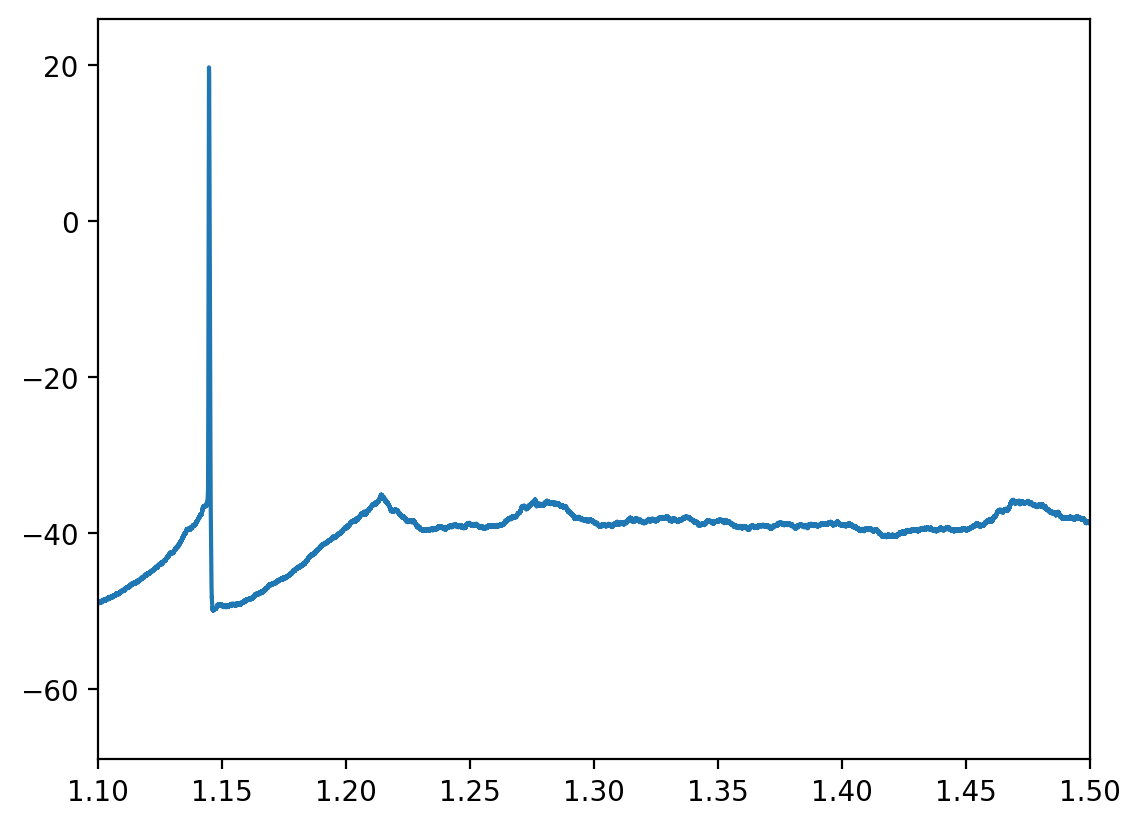

In [12]:
# Plot the raw recording here
plt.plot(timestamps, response_voltage); 
plt.xlim([1.1, 1.5])

<a id="morphology"></a>
## Step 4. Plot the morphology of the cell
The Cell Types Database also contains **3D reconstructions** of neuronal morphologies. Here, we'll plot the reconstruction of our cell's morphology.

*Note*: It will take several minutes to run the cell below, possibly longer over a slow internet connection. Running this cell is optional and can be skipped if necessary.

2024-04-26 10:27:53,171 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491120375
2024-04-26 10:27:53,566 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/501275935


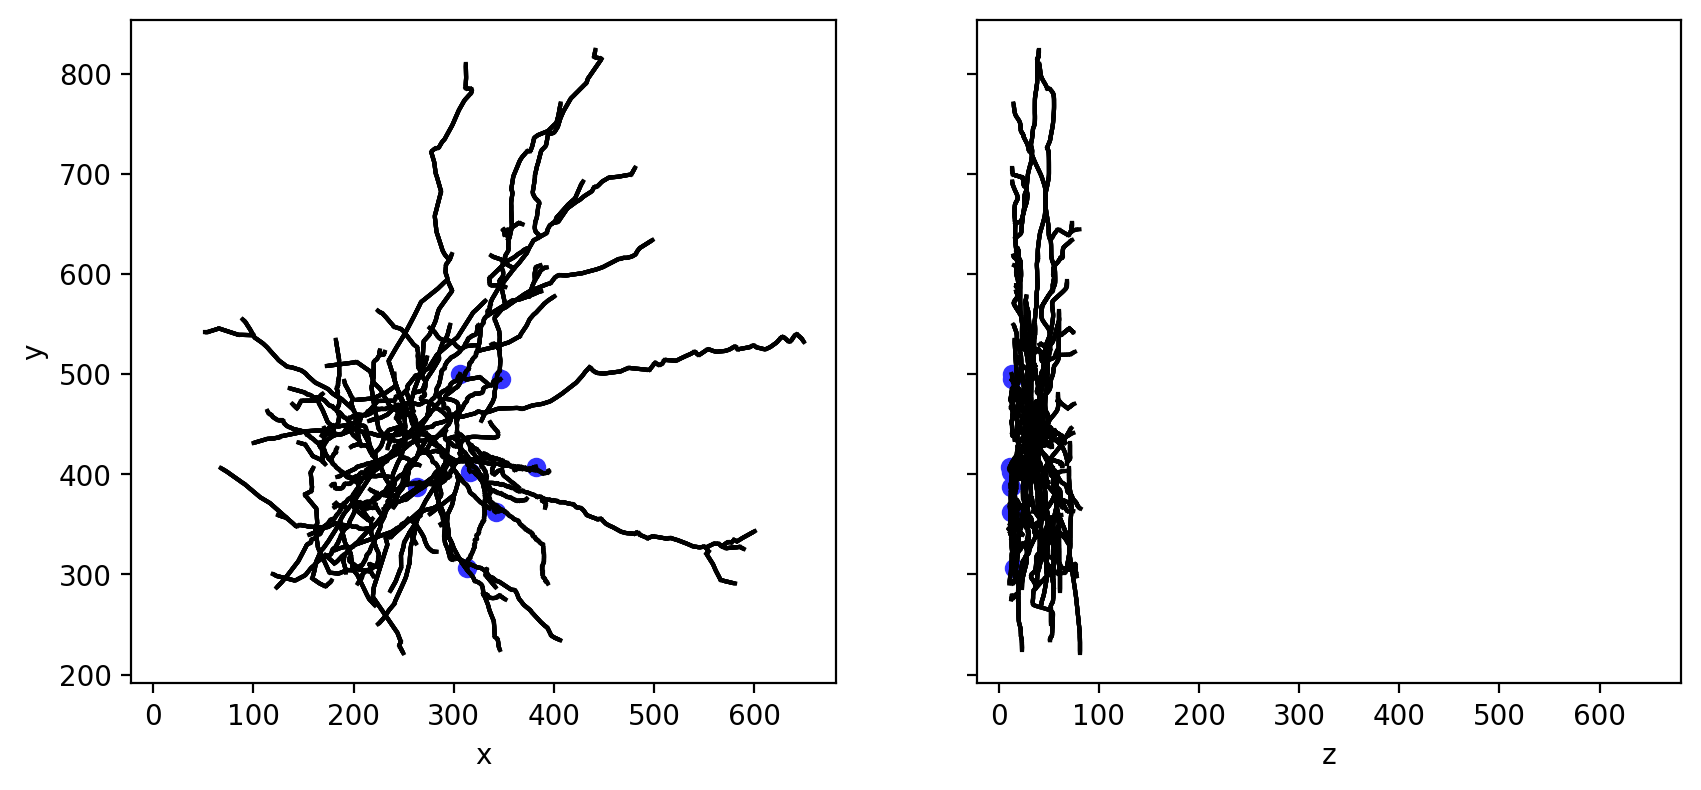

In [13]:
# Import necessary toolbox
from allensdk.core.swc import Marker

# Download and open morphology and marker files
morphology = ctc.get_reconstruction(cell_id) 
markers = ctc.get_reconstruction_markers(cell_id) 

# Set up our plot
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10,10))
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

# Make a line drawing of x-y and y-z views
for n in morphology.compartment_list:
    for c in morphology.children_of(n):
        axes[0].plot([n['x'], c['x']], [n['y'], c['y']], color='black')
        axes[1].plot([n['z'], c['z']], [n['y'], c['y']], color='black')

# cut dendrite markers
dm = [ m for m in markers if m['name'] == Marker.CUT_DENDRITE ]
axes[0].scatter([m['x'] for m in dm], [m['y'] for m in dm], color='#3333ff')
axes[1].scatter([m['z'] for m in dm], [m['y'] for m in dm], color='#3333ff')

# no reconstruction markers
nm = [ m for m in markers if m['name'] == Marker.NO_RECONSTRUCTION ]
axes[0].scatter([m['x'] for m in nm], [m['y'] for m in nm], color='#333333')
axes[1].scatter([m['z'] for m in nm], [m['y'] for m in nm], color='#333333')
axes[0].set_ylabel('y')
axes[0].set_xlabel('x')
axes[1].set_xlabel('z')
plt.show()

<a id="metrics"></a>
## Step 5. Analyze pre-computed features

The Cell Types Database contains a set of features that have already been computed, which could serve as good starting points for analysis. We can query the database to get these features. Below, we'll use the Pandas package that we imported above to create a **[dataframe](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe)** of our data.

><b>Task</b>: Run the cell below. It'll take ~10 seconds. It will print a list of all of the feature available, as well as produce a dataframe, which looks something like an Excel spreadsheet. You can scroll to the right to see many of the different features available in this dataset.

In [14]:
# Download all electrophysiology features for all cells
ephys_features = ctc.get_ephys_features()
dataframe = pd.DataFrame(ephys_features).set_index('specimen_id')

print('Ephys features available for %d cells:' % len(dataframe))
dataframe.head() # Just show the first 5 rows (the head) of our dataframe 

Ephys features available for 2333 cells:


,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
specimen_id,,,,,,,,,,,,,,,,,,,,,
529878215,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,13.295680,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391
548459652,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,20.650735,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595
579978640,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,-59.940975,...,2.551960,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321
439024551,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,-65.500000,...,9.576308,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559
515188639,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,-51.406253,...,2.490433,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991


As you can see in the dataframe above, there are many **pre-computed features** available in this dataset. [Here's a glossary](https://docs.google.com/document/d/1YGLwkMTebwrXd_1E817LFbztMjSTCWh83Mlp3_3ZMEo/edit?usp=sharing), in case you're curious.

![](https://github.com/ajuavinett/CellTypesLesson/blob/master/docs/ap_features.png?raw=true)
Image from the <a href="http://help.brain-map.org/download/attachments/8323525/CellTypes_Ephys_Overview.pdf">Allen Institute Cell Types Database Technical Whitepaper.</a>
<br><br>

Let's first look at the speed of the trough, and the ratio between the upstroke and downstroke of the action potential:
- **Action potential fast trough** (<code>fast_trough_v_long_square</code>): Minimum value of the membrane potential in the interval lasting 5 ms after the peak.
- **Upstroke/downstroke ratio** (<code>upstroke_downstroke_ratio_long_square</code>)</b>: The ratio between the absolute values of the action potential peak upstroke and the action potential peak downstroke.</div>

Above, we created a pandas dataframe of all of these features. Here, we'll assign the columns we're interested to two different **variables**, so that they will contain all of the datapoints we're interested in. We can access different columns of the dataframe by using the syntax `dataframe['column_of_interest']`. The columns of interest here are `fast_trough_v_long_square` and `upstroke_downstroke_ratio_long_square`].

><b>Task:</b> Edit and run the cell below to store these columns into our two new variables.

In [15]:
fast_trough = dataframe['fast_trough_v_long_square']
upstroke_downstroke = dataframe['upstroke_downstroke_ratio_long_square']

><b>Task:</b> Create a scatterplot that plots the fast trough (x axis) versus the upstroke-downstroke ratio (y axis). Label your axes accordingly using `plt.xlabel()` and `plt.ylabel()`.
    
If you need help, see the [`plt.scatter()` documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). 

Text(0, 0.5, 'upstroke-downstroke-ratio')

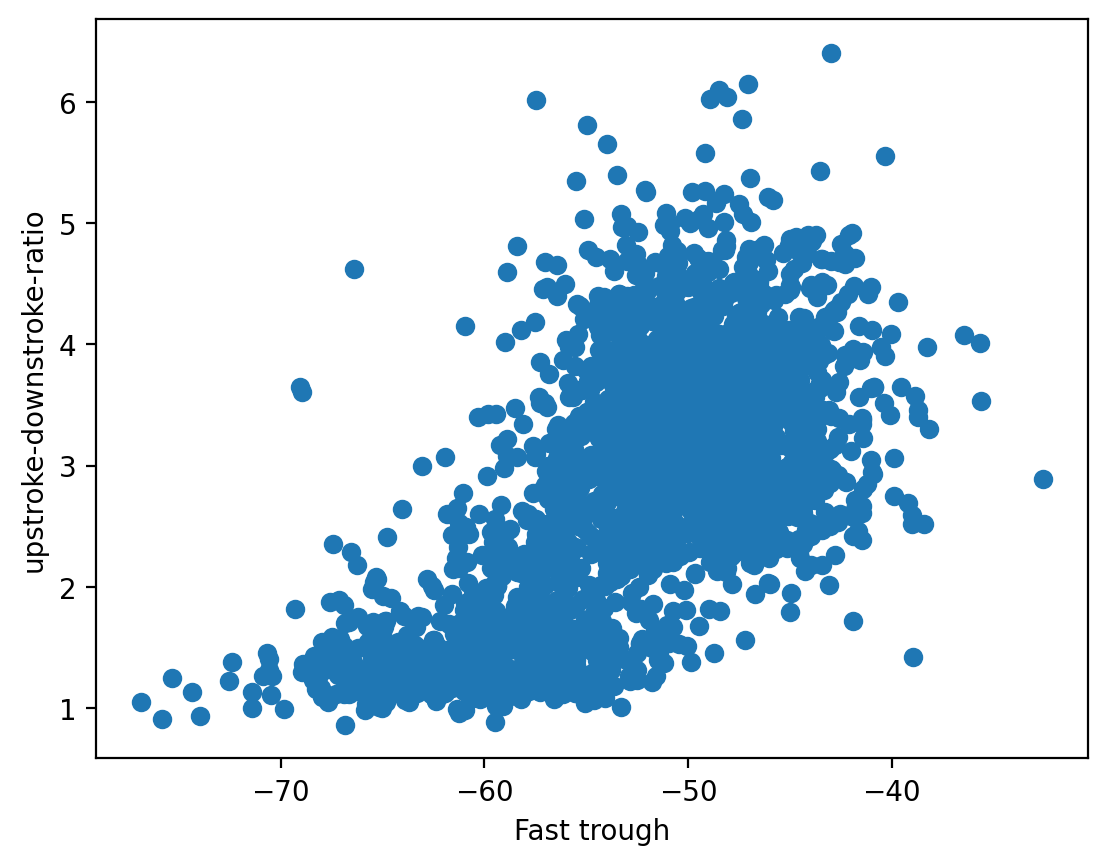

In [17]:
# Your scatterplot here
plt.scatter(fast_trough, upstroke_downstroke); 
plt.xlabel('Fast trough') 
plt.ylabel('upstroke-downstroke-ratio')

It looks like there may be roughly two clusters in the data above. Maybe they relate to whether the cells are presumably excitatory (spiny) cells or inhibitory (aspiny) cells. Let's query the API and split up the two sets to see.

><b>Task:</b> The cell below will dig up the dendrite type of these cells and add that to our dataframe. Then, it'll create our same scatterplot, where each dot is colored by dendrite type. All you need to do is run the cell!

In [18]:
cells = ctc.get_cells()

In [23]:
full_dataframe = dataframe.join(pd.DataFrame(cells).set_index('id'))
dataframe

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
specimen_id,,,,,,,,,,,,,,,,,,,,,
529878215,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,13.295680,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391
548459652,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,20.650735,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595
579978640,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,-59.940975,...,2.551960,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321
439024551,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,-65.500000,...,9.576308,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559
515188639,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,-51.406253,...,2.490433,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569955172,0.001963,9.182407,-1.750000,1.013889e+00,1.030300,12.216160,1.024077,-58.781250,-56.218753,-62.375003,...,12.216207,1.255667,-58.937500,-56.322920,-78.666672,1.477299,1.234940,1.447535,-88.937508,-78.321983
573410831,0.064670,102.640000,25.802499,1.585265e-01,1.273960,2.804420,1.025750,-49.187504,-49.062500,-50.593752,...,2.847900,1.979330,-61.281254,-59.187500,-74.328125,3.919119,4.053287,4.134621,-96.250008,-74.360977
576285618,0.239796,27.853333,-2.267500,7.307692e-02,1.095120,2.426287,1.025020,-51.531250,-50.437501,-52.481252,...,2.426347,1.633196,-51.593750,-50.510418,-70.618750,2.646425,2.688956,2.838209,-95.000008,-70.443848


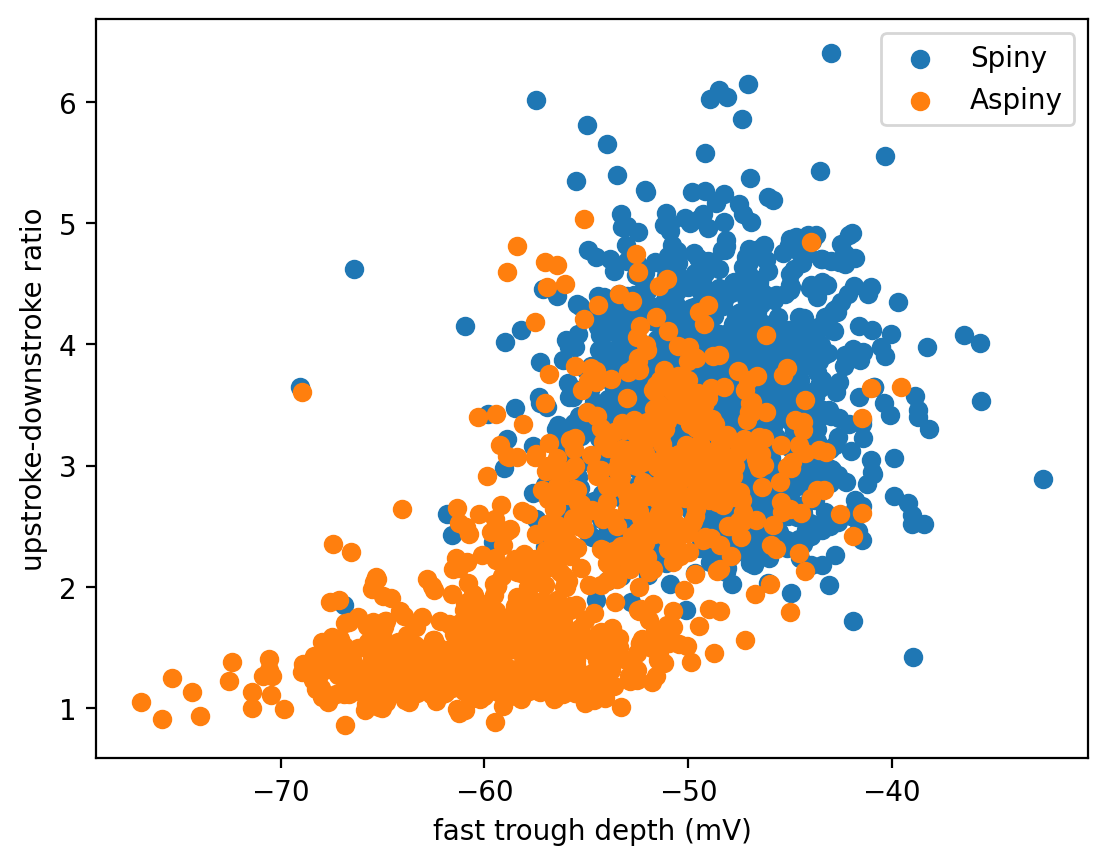

In [24]:
# Get information about our cells' dendrites
cells = ctc.get_cells()
full_dataframe = dataframe.join(pd.DataFrame(cells).set_index('id'))

# Create a dataframe for spiny cells, and a dataframe for aspiny cells
spiny_df = full_dataframe[full_dataframe['dendrite_type'] == 'spiny']
aspiny_df = full_dataframe[full_dataframe['dendrite_type'] == 'aspiny']

# Create our plot! Calling scatter twice like this will draw both of these on the same plot.
plt.scatter(spiny_df['fast_trough_v_long_square'],spiny_df['upstroke_downstroke_ratio_long_square'])
plt.scatter(aspiny_df['fast_trough_v_long_square'],aspiny_df['upstroke_downstroke_ratio_long_square'])

plt.ylabel('upstroke-downstroke ratio')
plt.xlabel('fast trough depth (mV)')
plt.legend(['Spiny','Aspiny'])
    
plt.show()

Looks like these two clusters do partially relate to the dendritic type. Cells with spiny dendrites (which are typically excitatory cells) have a big ratio of upstroke:downstroke, and a more shallow trough (less negative). Cells with aspiny dendrites (typically inhibitory cells) are a little bit more varied. But </i>only</i> aspiny cells have a low upstroke:downstroke ratio and a deeper trough (more negative).

<a id="waveforms"></a>

## Step 6. Compare waveforms
Let's take a closer look at the action potentials of these cells to see what these features actually mean for the action potential waveform by choosing one of the cells with the highest upstroke:downstroke ratio. Our first line of code, where it says `dataframe.sort_values()` is the code that will arrange our dataframe by the **upstroke_downstroke_ratio_long_square** column.

This first time around, we'll organize it so that the highest ratio is at the top (`ascending=False`). This is an example of a **boolean** in Python. You can change this to say `ascending=True` if you want to sort with *lowest* ratio at the top.

><b>Task</b>: Run the cell below.

In [29]:
# Sort the dataframe and reassign
sorted_dataframe = dataframe.sort_values('upstroke_downstroke_ratio_long_square',ascending=True)

# Assign one of the top cells in our dataframe (default = 2) and the ratio to different variables
specimen_id = sorted_dataframe.index[2]
ratio = sorted_dataframe.iloc[2]['upstroke_downstroke_ratio_long_square']

# Print our results so that we can see them
print('Specimen ID: ' + str(specimen_id) + ' with upstroke-downstroke ratio: ' + str(ratio))

Specimen ID: 569991910 with upstroke-downstroke ratio: 0.906845223777635


Now we can take a closer look at the action potential for that cell by grabbing a raw sweep of recording from it, just like we did above.

><b>Task:</b> Run the cell below. This may take a minute or so. *Note*: You may receive a "H5pyDeprecationWarning," but you can ignore this!

In [30]:
# Get the data for our specimen
upstroke_data = ctc.get_ephys_data(specimen_id)

# Get one sweep for our specimen (I've already handselected a gorgeous one for you, 45)
upstroke_sweep = upstroke_data.get_sweep(45) 

# Get the current & voltage traces
current = upstroke_sweep['stimulus'] * 1e12 # in A, converted to pA
voltage = upstroke_sweep['response'] * 1e3 # converted to mV!

# Get the time stamps for our voltage trace
timestamps = (np.arange(0, len(voltage)) * (1.0 / upstroke_sweep['sampling_rate']))

print('Sweep obtained')

2024-04-26 10:41:34,943 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/652561005


Sweep obtained


><b>Task:</b> Plot the sweep we obtained above. <i>Hint</i>: You'll want to use `plt.plot(x,y)` where `x` is the `timestamps` and `y` is the `voltage`. Be sure to give your plot accurate labels as well.

(1.5, 1.55)

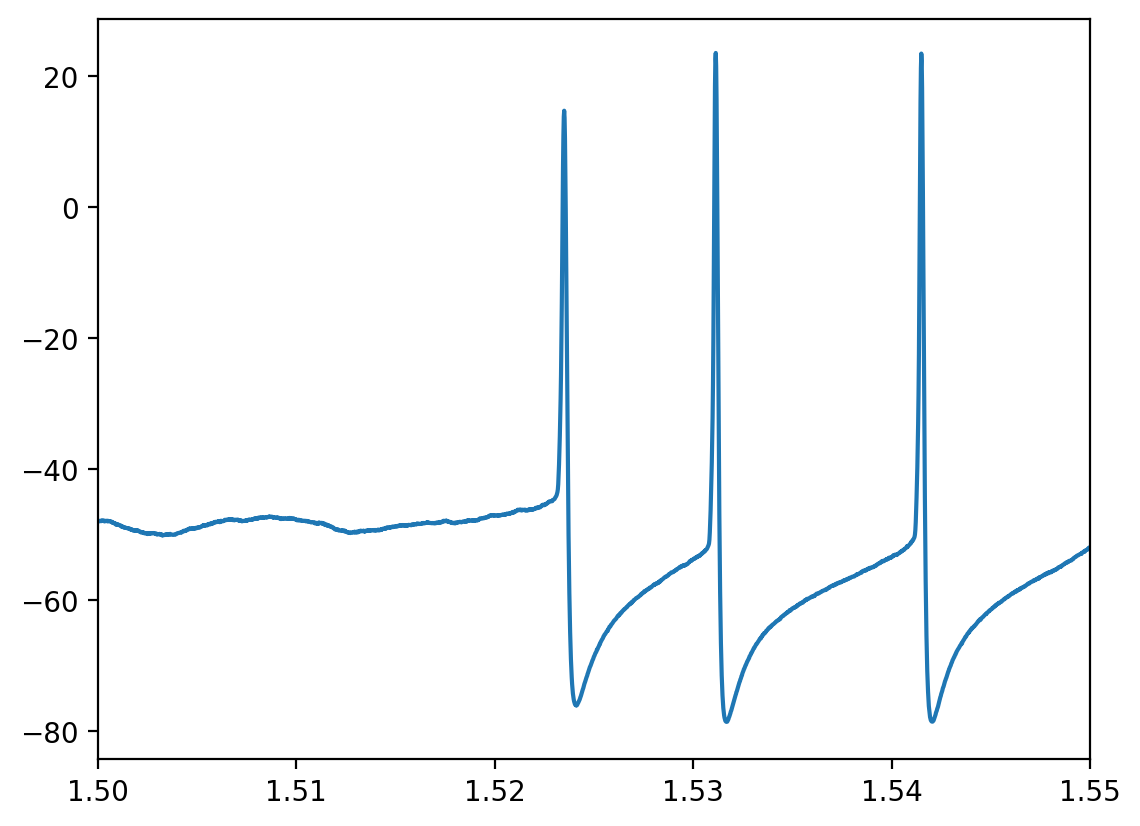

In [32]:
# Plot the new sweep here
plt.plot(timestamps, voltage); 
plt.xlim([1.5, 1.55])

><b>Task</b> Generate a similar plot for a cell with a <b>low</b> upstroke ratio. Similiar to above, zoom in on the x axis so that you can actually see the shape of the action potential waveform.

><b>Hint</b>: You only need to change <i>one</i> value in all of the code in this step in order to make this change. How did we arrange our dataframe at first?

As you'll hopefully see, even that one feature, upstroke:downstroke ratio, means the shape of the action potential is dramatically different. The other feature we looked at above, size of the trough, is highly correlated with upstroke:downstroke. You can see that by comparing the two cells here. Cells with high upstroke:downstroke tend to have less negative troughs (undershoots) after the action potential.

<a id="compare"></a>

## Step 7. Compare cell types
Let's get out of the action potential weeds a bit. What if we want to know a big picture thing, such as are *human cells different than mouse cells?* Or *how are excitatory cells different from inhibitory cells?*  To ask these questions, we can pull out the data for two different cell types, defined by their species, dendrite type, or transgenic line.

**About Transgenic Cre Lines.** The Allen Institute for Brain Science uses transgenic mouse lines that have Cre-expressing cells to mark specific types of cells in the brain. This technology is called the **Cre-Lox system**, and is a common way in neuroscience (and some other fields) to target cells based on their expression of specific genetic promotors. For more information about Cre/Lox technology, see [this website](https://old.abmgood.com/marketing/knowledge_base/Cre-Lox_Recombination.php). Information about the different Cre lines that are available can be found in [this glossary](https://docs.google.com/document/d/1ZMMZgc7cS5BHhoWNqzjw95BdxOuj5wrYl9I7PV2HeUI/edit?usp=sharing) or on the [Allen Institute's website](http://connectivity.brain-map.org/transgenic).

**For this final step, it's up to you to choose which cell types to compare.** You'll also decide which pre-computed feature to compare between these cell types.

- If you'd like to compare cells from different **species**, the column name is `species`.
- If you'd like to compare **spiny vs. aspiny cells**, the column name is `dendrite_type`.
- If you'd like to compare two **transgenic lines** (mouse cells only), the column name is `transgenic_line`. What if we want to know whether different genetically-identified cells have different intrinsic physiology?


>**Task**: Assign `column_name` below to the name of your column to see the unique values in that column. Make sure your column is a **string**, in other words, it should be in single  quotes.

In [37]:
# Define your column name below
column_name = 'transgenic_line'

print(full_dataframe[column_name].unique())

['' 'Ndnf-IRES2-dgCre' 'Htr3a-Cre_NO152' 'Scnn1a-Tg3-Cre' 'Nkx2-1-CreERT2'
 'Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre' 'Vip-IRES-Cre' 'Rorb-IRES2-Cre'
 'Pvalb-IRES-Cre' 'Ntsr1-Cre_GN220' 'Chat-IRES-Cre-neo' 'Nr5a1-Cre'
 'Gad2-IRES-Cre' 'Sst-IRES-Cre' 'Sim1-Cre_KJ18' 'Cux2-CreERT2'
 'Ctgf-T2A-dgCre' 'Tlx3-Cre_PL56' 'Scnn1a-Tg2-Cre' 'Esr2-IRES2-Cre-neo'
 'Rbp4-Cre_KL100' 'Glt25d2-Cre_NF107' 'Oxtr-T2A-Cre' 'Chrna2-Cre_OE25'
 'Esr2-IRES2-Cre' 'Vipr2-IRES2-Cre' 'Htr3a-Cre_NO152|Pvalb-T2A-Dre'
 'Nos1-CreERT2|Sst-IRES-FlpO' 'Nos1-CreERT2' 'Esr2-IRES2-Cre|PhiC31-neo'
 'Chrna2-Cre_OE25|Pvalb-T2A-Dre' 'Penk-IRES2-Cre-neo'
 'Vipr2-IRES2-Cre-neo' 'Esr2-IRES2-Cre-neo|PhiC31-neo' 'Gng7-Cre_KH71'
 'Pvalb-T2A-CreERT2' 'Pvalb-T2A-FlpO|Vipr2-IRES2-Cre' 'Slc17a6-IRES-Cre']


> Using the possible values in your column, create two separate dataframes by **subsetting** the dataframe below. Assign `celltype_1` and `celltype_2` to the names of your cell types, for example 'spiny' and 'aspiny'. Make sure your cell type names are in quotes (they should be strings) and *exactly* match what is found in the dataframe.

In [40]:
# Define your cell type variables below
celltype_1 = 'Pvalb-IRES-Cre'
celltype_2 = 'Slc17a6-IRES-Cre'

celltype_1_df = full_dataframe[full_dataframe[column_name] == celltype_1]
celltype_2_df = full_dataframe[full_dataframe[column_name] == celltype_2]

print("Type 1 # Cells: %d" % len(celltype_1_df))
print("Type 2 # Cells: %d" % len(celltype_2_df))

Type 1 # Cells: 217
Type 2 # Cells: 3


Let's start by plotting a distribution of the recorded resting membrane potential (`vrest`) for one cell type versuss the other cell type.

>**Task**: Run the cell below to plot a histogram to compare one pre-computedd feature of your choice between your two cell types.

- Note that the distribution is normalized by the total count (`density=True`), since there may be very different numbers of cells for your two cell types. You can set `density` to false to plot the raw numbers of cells.
- You can also specify the number of bins with `bins= < #bins > `.
- Look through the [`plt.hist()` documentation](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html) for more information.

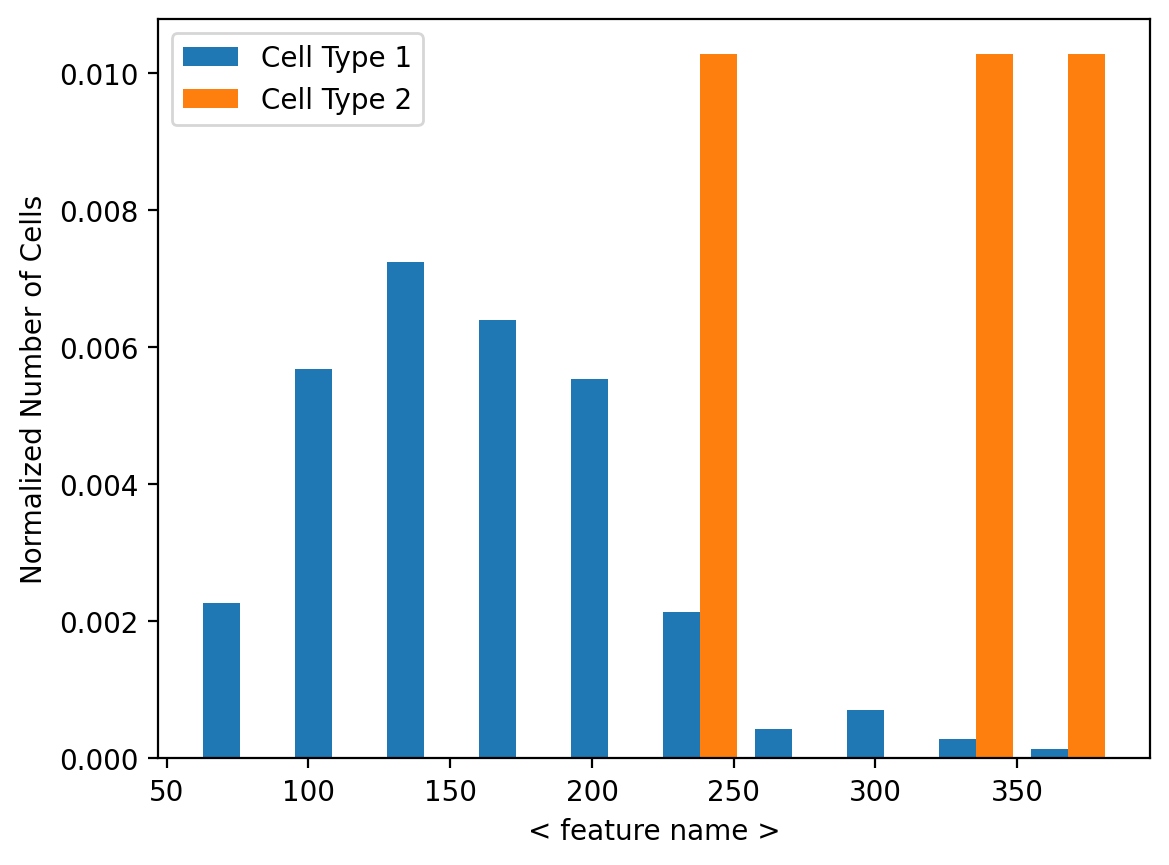

In [43]:
plt.figure()

# Change your feature below.
feature = 'input_resistance_mohm'

# Plot the histogram, with density = True 
plt.hist([celltype_1_df[feature],celltype_2_df[feature]],density = True)

# Change the x label below:
plt.xlabel('< feature name >')
plt.ylabel('Normalized Number of Cells')
plt.legend(['Cell Type 1','Cell Type 2'])
plt.show()

> <b>Task</b>: Choose a different feature to compare between your cell types, and rerun the plot above. Use the documentation below to get the exact name of the feature (in parentheses), and change the x label axis so that we know what you're plotting.  Right click to save your image when you're done.

Here are a few additional pre-computed features you might consider comparing (you can find a complete glossary [here](https://docs.google.com/document/d/1YGLwkMTebwrXd_1E817LFbztMjSTCWh83Mlp3_3ZMEo/edit?usp=sharing)):

- <b>Tau (<code>tau</code>)</b>: time constant of the membrane in milliseconds
- <b>Adapation ratio (<code>adaptation</code>)</b>: The rate at which firing speeds up or slows down during a stimulus<br>
- <b>Average ISI (<code>avg_isi</code>)</b>: The mean value of all interspike intervals in a sweep<br>
- **Slope of f/I curve** (<code>f_i_curve_slope</code>)</b>: slope of the curve between firing rate (f) and current injected<br>
- **Input Resistance** (<code>input_resistance_mohm</code>)</b>: The input resistance of the cell, in megaohms.<br>
- **Voltage of after-hyperpolarization** (<code>trough_v_short_square</code>)</b>: minimum value of the membrane potential during the after-hyperpolarization

><b>Task</b>: It's more common to plot summary statistics like a mean or median, so let's compare our two cell types with a boxplot. To do so, we can use `plt.boxplot()` ([Documentation here](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.boxplot.html)). The code below is already set up for you -- just run it and edit your labels as necessary. Right click to save the plot when you're done.

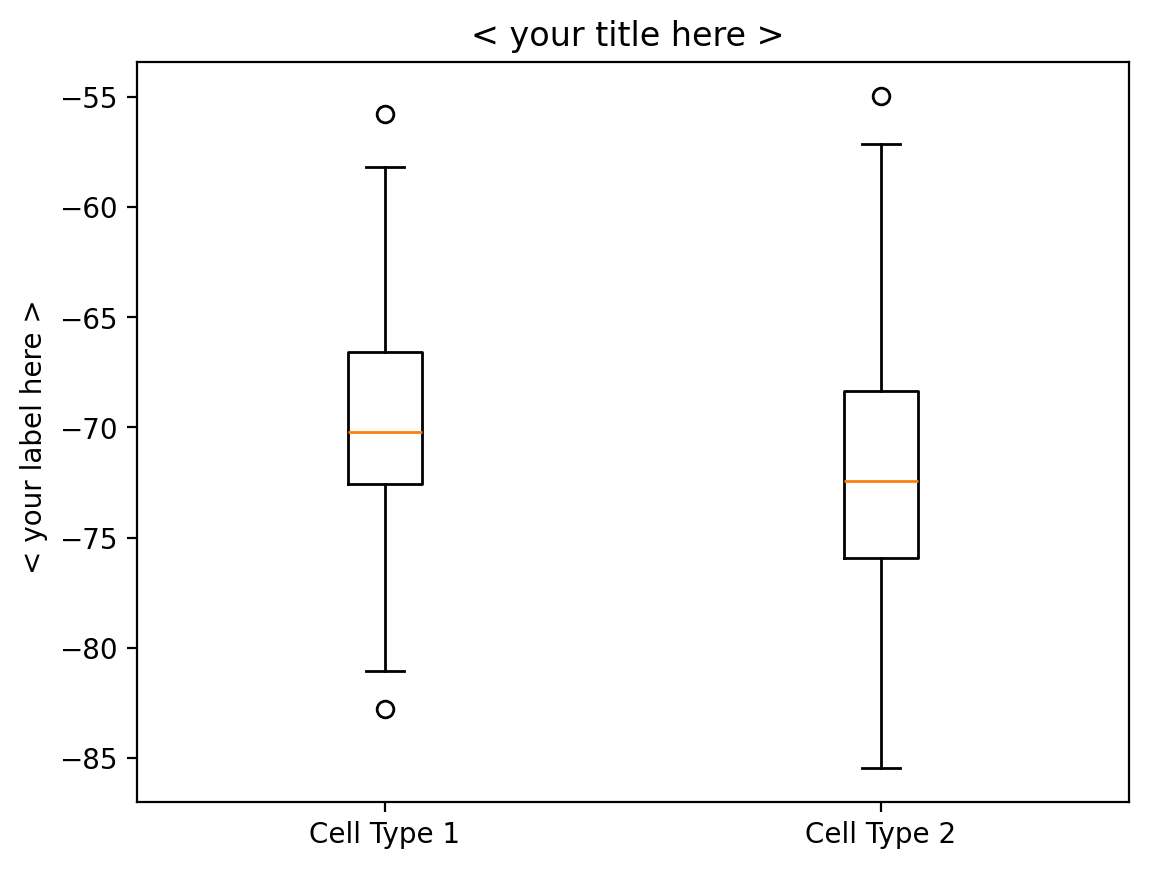

In [36]:
# Boxplot creation lines below
plt.boxplot([celltype_1_df[feature],celltype_2_df[feature]])
plt.ylabel('< your label here > ') # y-axis label
plt.xticks([1, 2], ['Cell Type 1','Cell Type 2'])

# Plot title -- be sure to update!
plt.title('< your title here > ')

plt.show()

TODO: comparing the input_resistance of parvalbumin neurons ('Pvalb-IRES-Cre') and glutamatergic neurons ('Slc17a6-IRES-Cre')


That's it for today -- great work!

In [ ]:
from IPython.display import HTML
print('Nice work!')
HTML('<img src="https://media.giphy.com/media/xUOwGhOrYP0jP6iAy4/giphy.gif">')

-----------

## Technical notes & credits

This notebook demonstrates most of the features of the AllenSDK that help manipulate data in the Cell Types Database.  The main entry point will be through the `CellTypesCache` class. `CellTypesCache` is responsible for downloading Cell Types Database data to a standard directory structure on your hard drive.  If you use this class, you will not have to keep track of where your data lives, other than a root directory.

Much more information can be found in the <a href="http://help.brain-map.org/download/attachments/8323525/CellTypes_Ephys_Overview.pdf">Allen Brain Atlas whitepaper</a> as well as in their <a href="http://alleninstitute.github.io/AllenSDK/cell_types.html">GitHub documentation</a>.

This file modified from <a href='https://alleninstitute.github.io/AllenSDK/_static/examples/nb/cell_types.html'>this</a> notebook.

In case you're curious, <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html ">here's documentation</a> for plotting pandas series (which we do quite a bit above). You can always Google questions you have!)